<a href="https://colab.research.google.com/github/AlinaGordymova/sql_lessons_homeworks/blob/main/Homework_lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#установка библиотек
# !pip install psycopg2
# !pip install plotly

In [ ]:
import sqlite3
conn_sqlite = sqlite3.connect('TestDB.db')  

In [ ]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px


#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student3'
DB_USER_PASSWORD = 'student3_password'
DB_NAME = 'sql_ex_third_stream'

conn_psql = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#-task1  (lesson7)
# sqlite3: Сделать тестовый проект с БД (sqlite3, project name: task1_7). В таблицу table1 записать 1000 строк с случайными значениями (3 колонки, тип int) от 0 до 1000.
# Далее построить гистаграмму распределения этих трех колонок


In [ ]:
df = pd.read_sql('''
with recursive generate_series(r1,r2,r3) as (
    select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    union all select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    from generate_series
    limit 1000)
 select * from generate_series;
''', conn_sqlite)

In [ ]:
df

,r1,r2,r3
0,173,800,625
1,675,709,939
2,534,459,941
3,678,767,193
4,991,458,596
...,...,...,...
995,975,18,190
996,411,971,960
997,841,425,922
998,550,830,463


In [ ]:
request = '''
with recursive generate_series(r1,r2,r3) as (
    select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    union all select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    from generate_series
    limit 1000)
 select * from generate_series;
'''
df = pd.read_sql_query(request, conn_sqlite)
fig = px.bar(x=df.r1.to_list(), y=df.r2.to_list(), labels={'x':'r1', 'y':'r2'})
fig.show()

In [ ]:
request = '''
with recursive generate_series(r1,r2,r3) as (
    select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    union all select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    from generate_series
    limit 1000)
 select * from generate_series;
'''
df = pd.read_sql_query(request, conn_sqlite)
fig = px.bar(x=df.r2.to_list(), y=df.r3.to_list(), labels={'x':'r2', 'y':'r3'})
fig.show()

In [ ]:
request = '''
with recursive generate_series(r1,r2,r3) as (
    select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    union all select abs(random() % 1000) as r1, abs(random() % 1000) as r2, abs(random() % 1000) as r3
    from generate_series
    limit 1000)
 select * from generate_series;
'''
df = pd.read_sql_query(request, conn_sqlite)
fig = px.bar(x=df.r1.to_list(), y=df.r3.to_list(), labels={'x':'r1', 'y':'r3'})
fig.show()

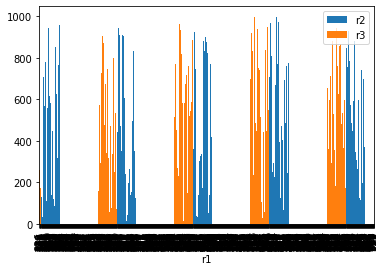

In [ ]:
df.plot(kind= 'bar', x='r1', y=['r2', 'r3'])